In [1]:
pwd

'/mmfs1/data/bergerar/BC-sim/Code'

In [1]:
import os
import ants
import numpy as np

In [2]:
import pandas as pd
from numpy import load

In [33]:
adhd_collect = np.array([ants.image_read(f'../synth-data-01/ADHD-sub-{s:04d}.nii.gz').numpy() for s in range(500)])

In [5]:
def norm(mat):
    return (mat - mat.min()) / (mat.max()-mat.min())

In [39]:
adhd_collect = np.array([norm(adhd_collect[i,:,:,:]) for i in range(adhd_collect.shape[0])])
adhd_collect.shape

(500, 64, 64, 64)

In [42]:
np.savez_compressed(file='../../BC-sim/synth-data-01/brain-array-adhd.npz',data=adhd_collect)

In [49]:
adhd_df = pd.read_csv('../../BC-sim/synth-data-01/tx_log_adhd.csv')
adhd_df

,Unnamed: 0,Sphere 1,Sphere 2
0,0,12.834489,10.035014
1,1,11.011581,11.316208
2,2,12.606499,14.643771
3,3,10.869074,13.482636
4,4,6.159082,6.337349
...,...,...,...
495,495,7.543617,9.531810
496,496,12.901628,10.921605
497,497,5.062251,3.099718
498,498,14.173622,13.385439


In [52]:
new = adhd_df['Unnamed: 0'].astype(str).str.zfill(4)

In [56]:
new_arr = np.array(new)

In [58]:
adhd_df = adhd_df.assign(Sub=new_arr)

In [59]:
adhd_df

,Unnamed: 0,Sphere 1,Sphere 2,Sub
0,0,12.834489,10.035014,0000
1,1,11.011581,11.316208,0001
2,2,12.606499,14.643771,0002
3,3,10.869074,13.482636,0003
4,4,6.159082,6.337349,0004
...,...,...,...,...
495,495,7.543617,9.531810,0495
496,496,12.901628,10.921605,0496
497,497,5.062251,3.099718,0497
498,498,14.173622,13.385439,0498


In [60]:
adhd_df = adhd_df[['Unnamed: 0', 'Sub', 'Sphere 1', 'Sphere 2']]
adhd_df

,Unnamed: 0,Sub,Sphere 1,Sphere 2
0,0,0000,12.834489,10.035014
1,1,0001,11.011581,11.316208
2,2,0002,12.606499,14.643771
3,3,0003,10.869074,13.482636
4,4,0004,6.159082,6.337349
...,...,...,...,...
495,495,0495,7.543617,9.531810
496,496,0496,12.901628,10.921605
497,497,0497,5.062251,3.099718
498,498,0498,14.173622,13.385439


In [62]:
#adhd_df.rename(columns={'Unnamed: 0': 'S'}, inplace=True)
adhd_df

,S,Sub,Sphere 1,Sphere 2
0,0,0000,12.834489,10.035014
1,1,0001,11.011581,11.316208
2,2,0002,12.606499,14.643771
3,3,0003,10.869074,13.482636
4,4,0004,6.159082,6.337349
...,...,...,...,...
495,495,0495,7.543617,9.531810
496,496,0496,12.901628,10.921605
497,497,0497,5.062251,3.099718
498,498,0498,14.173622,13.385439


In [63]:
l = [1] * 500

In [64]:
adhd_df = adhd_df.assign(DX=l)

In [65]:
adhd_df

,S,Sub,Sphere 1,Sphere 2,DX
0,0,0000,12.834489,10.035014,1
1,1,0001,11.011581,11.316208,1
2,2,0002,12.606499,14.643771,1
3,3,0003,10.869074,13.482636,1
4,4,0004,6.159082,6.337349,1
...,...,...,...,...,...
495,495,0495,7.543617,9.531810,1
496,496,0496,12.901628,10.921605,1
497,497,0497,5.062251,3.099718,1
498,498,0498,14.173622,13.385439,1


In [66]:
# adhd_df.to_csv('sim_adhd.csv')

In [20]:
adhd_df = pd.read_csv('../../BC-sim/Code/sim_adhd.csv')
adhd_df

,Unnamed: 0,S,Sub,Sphere 1,Sphere 2,DX
0,0,0,0,12.834489,10.035014,1
1,1,1,1,11.011581,11.316208,1
2,2,2,2,12.606499,14.643771,1
3,3,3,3,10.869074,13.482636,1
4,4,4,4,6.159082,6.337349,1
...,...,...,...,...,...,...
495,495,495,495,7.543617,9.531810,1
496,496,496,496,12.901628,10.921605,1
497,497,497,497,5.062251,3.099718,1
498,498,498,498,14.173622,13.385439,1


In [21]:
adhd_df.__delitem__('Unnamed: 0')
adhd_df

,S,Sub,Sphere 1,Sphere 2,DX
0,0,0,12.834489,10.035014,1
1,1,1,11.011581,11.316208,1
2,2,2,12.606499,14.643771,1
3,3,3,10.869074,13.482636,1
4,4,4,6.159082,6.337349,1
...,...,...,...,...,...
495,495,495,7.543617,9.531810,1
496,496,496,12.901628,10.921605,1
497,497,497,5.062251,3.099718,1
498,498,498,14.173622,13.385439,1


In [3]:
td_collect = np.array([ants.image_read(f'../synth-data-01/TD-sub-{s:04d}.nii.gz').numpy() for s in range(500)])

In [6]:
td_collect = np.array([norm(td_collect[i,:,:,:]) for i in range(td_collect.shape[0])])
td_collect.shape

(500, 64, 64, 64)

In [7]:
np.savez_compressed(file='../../BC-sim/synth-data-01/brain-array-td.npz',data=td_collect)

In [8]:
td_df = pd.read_csv('../../BC-sim/synth-data-01/tx_log_td.csv')
td_df

,Unnamed: 0,Sphere 1,Sphere 2
0,0,24.636458,20.592753
1,1,15.945992,12.212052
2,2,19.401910,15.016307
3,3,31.737532,26.812256
4,4,24.533527,25.962776
...,...,...,...
495,495,29.806246,31.775410
496,496,14.683680,13.065503
497,497,18.065294,13.891190
498,498,14.391185,19.336634


In [9]:
new = td_df['Unnamed: 0'].astype(str).str.zfill(4)

In [10]:
new_arr = np.array(new)

In [11]:
td_df = td_df.assign(Sub=new_arr)

In [12]:
td_df

,Unnamed: 0,Sphere 1,Sphere 2,Sub
0,0,24.636458,20.592753,0000
1,1,15.945992,12.212052,0001
2,2,19.401910,15.016307,0002
3,3,31.737532,26.812256,0003
4,4,24.533527,25.962776,0004
...,...,...,...,...
495,495,29.806246,31.775410,0495
496,496,14.683680,13.065503,0496
497,497,18.065294,13.891190,0497
498,498,14.391185,19.336634,0498


In [13]:
td_df = td_df[['Unnamed: 0', 'Sub', 'Sphere 1', 'Sphere 2']]
td_df

,Unnamed: 0,Sub,Sphere 1,Sphere 2
0,0,0000,24.636458,20.592753
1,1,0001,15.945992,12.212052
2,2,0002,19.401910,15.016307
3,3,0003,31.737532,26.812256
4,4,0004,24.533527,25.962776
...,...,...,...,...
495,495,0495,29.806246,31.775410
496,496,0496,14.683680,13.065503
497,497,0497,18.065294,13.891190
498,498,0498,14.391185,19.336634


In [14]:
td_df.rename(columns={'Unnamed: 0': 'S'}, inplace=True)
td_df

,S,Sub,Sphere 1,Sphere 2
0,0,0000,24.636458,20.592753
1,1,0001,15.945992,12.212052
2,2,0002,19.401910,15.016307
3,3,0003,31.737532,26.812256
4,4,0004,24.533527,25.962776
...,...,...,...,...
495,495,0495,29.806246,31.775410
496,496,0496,14.683680,13.065503
497,497,0497,18.065294,13.891190
498,498,0498,14.391185,19.336634


In [15]:
l = [0] * 500

In [16]:
td_df = td_df.assign(DX=l)

In [17]:
td_df

,S,Sub,Sphere 1,Sphere 2,DX
0,0,0000,24.636458,20.592753,0
1,1,0001,15.945992,12.212052,0
2,2,0002,19.401910,15.016307,0
3,3,0003,31.737532,26.812256,0
4,4,0004,24.533527,25.962776,0
...,...,...,...,...,...
495,495,0495,29.806246,31.775410,0
496,496,0496,14.683680,13.065503,0
497,497,0497,18.065294,13.891190,0
498,498,0498,14.391185,19.336634,0


In [31]:
td_df.to_csv('sim_td.csv')

In [23]:
df_all = pd.concat([adhd_df, td_df])
df_all

,S,Sub,Sphere 1,Sphere 2,DX
0,0,0,12.834489,10.035014,1
1,1,1,11.011581,11.316208,1
2,2,2,12.606499,14.643771,1
3,3,3,10.869074,13.482636,1
4,4,4,6.159082,6.337349,1
...,...,...,...,...,...
495,495,0495,29.806246,31.775410,0
496,496,0496,14.683680,13.065503,0
497,497,0497,18.065294,13.891190,0
498,498,0498,14.391185,19.336634,0


In [25]:
n = 999
output = [i for i in range(0, n+1)]
print(output)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [26]:
df_all['S'] = output

In [27]:
df_all

,S,Sub,Sphere 1,Sphere 2,DX
0,0,0,12.834489,10.035014,1
1,1,1,11.011581,11.316208,1
2,2,2,12.606499,14.643771,1
3,3,3,10.869074,13.482636,1
4,4,4,6.159082,6.337349,1
...,...,...,...,...,...
495,995,0495,29.806246,31.775410,0
496,996,0496,14.683680,13.065503,0
497,997,0497,18.065294,13.891190,0
498,998,0498,14.391185,19.336634,0


In [28]:
df_all.rename(columns={'S': 'Index'}, inplace=True)

In [29]:
df_all

,Index,Sub,Sphere 1,Sphere 2,DX
0,0,0,12.834489,10.035014,1
1,1,1,11.011581,11.316208,1
2,2,2,12.606499,14.643771,1
3,3,3,10.869074,13.482636,1
4,4,4,6.159082,6.337349,1
...,...,...,...,...,...
495,995,0495,29.806246,31.775410,0
496,996,0496,14.683680,13.065503,0
497,997,0497,18.065294,13.891190,0
498,998,0498,14.391185,19.336634,0


In [30]:
# df_all.to_csv('sim_all.csv')

In [ ]:
# numpy.load('output1.npz')
# numpy.load('output2.npz')
# a3 =[*a1,*a2] # to merge them. 
# numpy.savez('output.npz',a3)

In [46]:
adhd_collect = np.array([ants.image_read(f'../synth-data-01/ADHD-sub-{s:04d}.nii.gz').numpy() for s in range(500)])

In [47]:
td_collect = np.array([ants.image_read(f'../synth-data-01/TD-sub-{s:04d}.nii.gz').numpy() for s in range(500)])

In [51]:
all_arr = np.concatenate((td_collect, adhd_collect), axis=0, out=None, dtype=None, casting="same_kind")

In [52]:
all_arr = np.array([norm(all_arr[i,:,:,:]) for i in range(all_arr.shape[0])])
all_arr.shape

(1000, 64, 64, 64)

In [54]:
from matplotlib import pyplot as plt

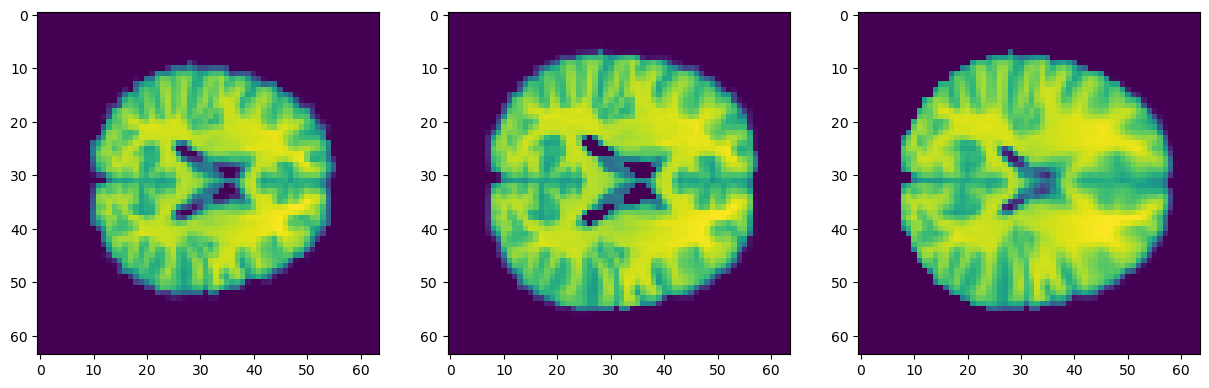

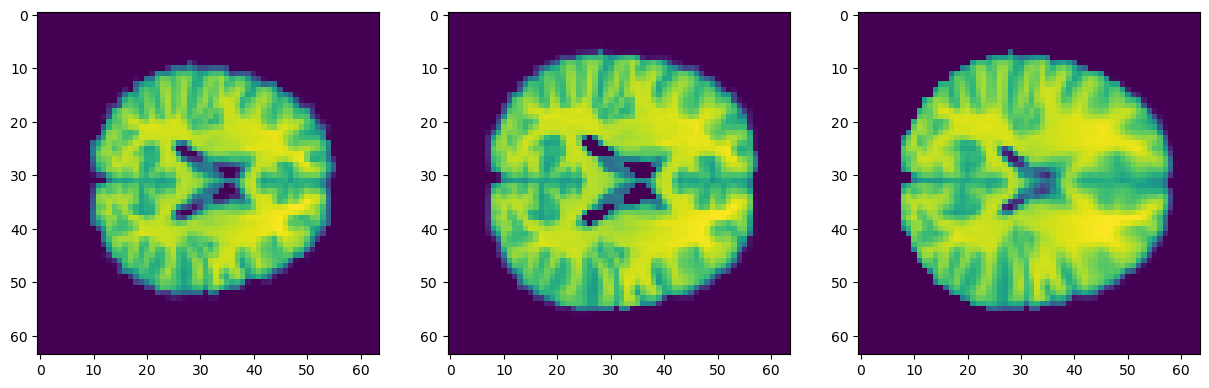

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(all_arr[0,:,:,32])

plt.subplot(1,3,2)
plt.imshow(all_arr[233,:,:,32])

plt.show()

In [57]:
controls = df_all['DX'].values==0
patients = df_all['DX'].values!=0

In [59]:
np.savez_compressed(file='../../BC-sim/synth-data-01/sim-brain-array-1.npz',data=all_arr,controls=controls,patients=patients)

In [42]:
# np.savez_compressed(file='../../BC-sim/synth-data-01/sim-brain-array-1.npz',data=all_arr, 

In [60]:
list(np.load('../../BC-sim/synth-data-01/sim-brain-array-1.npz').keys())

['data', 'controls', 'patients']